# Predicting Heart Disease Using Clinical Variables


https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var

The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries. Provided with this data set is an opportunity to evaluate how these characteristics interact with each other in order to determine an individual’s level of risk for developing cardiovascular problems that lead to heart failure or stroke. With this knowledge we can create preventative strategies beyond what traditional medical treatment can do by identifying those at risk earlier and aid our healthcare professionals in treating them better. By analyzing a combination of clinical variables explained here, we have a powerful tool at our fingertips to try and combat cardiovascular illness before it even has the chance to take root!

Column name	Description

- Age	The age of the patient. (Numeric)

- Sex	The gender of the patient. (Categorical)

- Chest pain type	The type of chest pain experienced by the patient. (Categorical)

- BP	The blood pressure level of the patient. (Numeric)

- Cholesterol	The cholesterol level of the patient. (Numeric)

- FBS over 120	The fasting blood sugar test results over 120 mg/dl. (Numeric)

- EKG results	The electrocardiogram results of the patient. (Categorical)

- Max HR	The maximum heart rate levels achieved during exercise testing. (Numeric)

- Exercise angina	The angina experienced during exercise testing. (Categorical)

- ST depression	The ST depression on an Electrocardiogram. (Numeric)

- Slope of ST	The slope of ST segment electrocardiogram readings. (Categorical)

- Number of vessels fluro	The amount vessels seen in Fluoroscopy images. (Numeric)

- Thallium	The Thallium Stress test findings. (Categorical)

- Heart Disease	Whether or not the patient has been diagnosed with Heart Disease. (Categorical)

## Objectives

The objectives of this exercise are:
- Explore the dataset
- Visualize the data
- Compare standard Logistic Regression with Neural Network

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import Normalizer, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Input, InputLayer
import seaborn as sns

## Load the Data

In [2]:
df = pd.read_csv('archive.zip', index_col='index')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:

df.replace({'Heart Disease': {'Presence': 1, 'Absence': 0}}, inplace=True)
df['Heart Disease'] = df['Heart Disease'].astype(int)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int32
dtype: object

In [6]:
df.isna().any(axis=0)

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


## Data Cleanup
We will keep only the numeric data.

In [8]:
numCols = ['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression', 'Number of vessels fluro']
allCols = ['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Heart Disease']

In [9]:
df = df[allCols]

In [10]:
df.head()

,Age,BP,Cholesterol,FBS over 120,Max HR,ST depression,Number of vessels fluro,Heart Disease
index,,,,,,,,
0,70,130,322,0,109,2.4,3,1
1,67,115,564,0,160,1.6,0,0
2,57,124,261,0,141,0.3,0,1
3,64,128,263,0,105,0.2,1,0
4,74,120,269,0,121,0.2,1,0


In [11]:
df.describe()

,Age,BP,Cholesterol,FBS over 120,Max HR,ST depression,Number of vessels fluro,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.148148,149.677778,1.05000,0.670370,0.444444
std,9.109067,17.861608,51.686237,0.355906,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.00000,0.000000,0.000000
25%,48.000000,120.000000,213.000000,0.000000,133.000000,0.00000,0.000000,0.000000
50%,55.000000,130.000000,245.000000,0.000000,153.500000,0.80000,0.000000,0.000000
75%,61.000000,140.000000,280.000000,0.000000,166.000000,1.60000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,6.20000,3.000000,1.000000


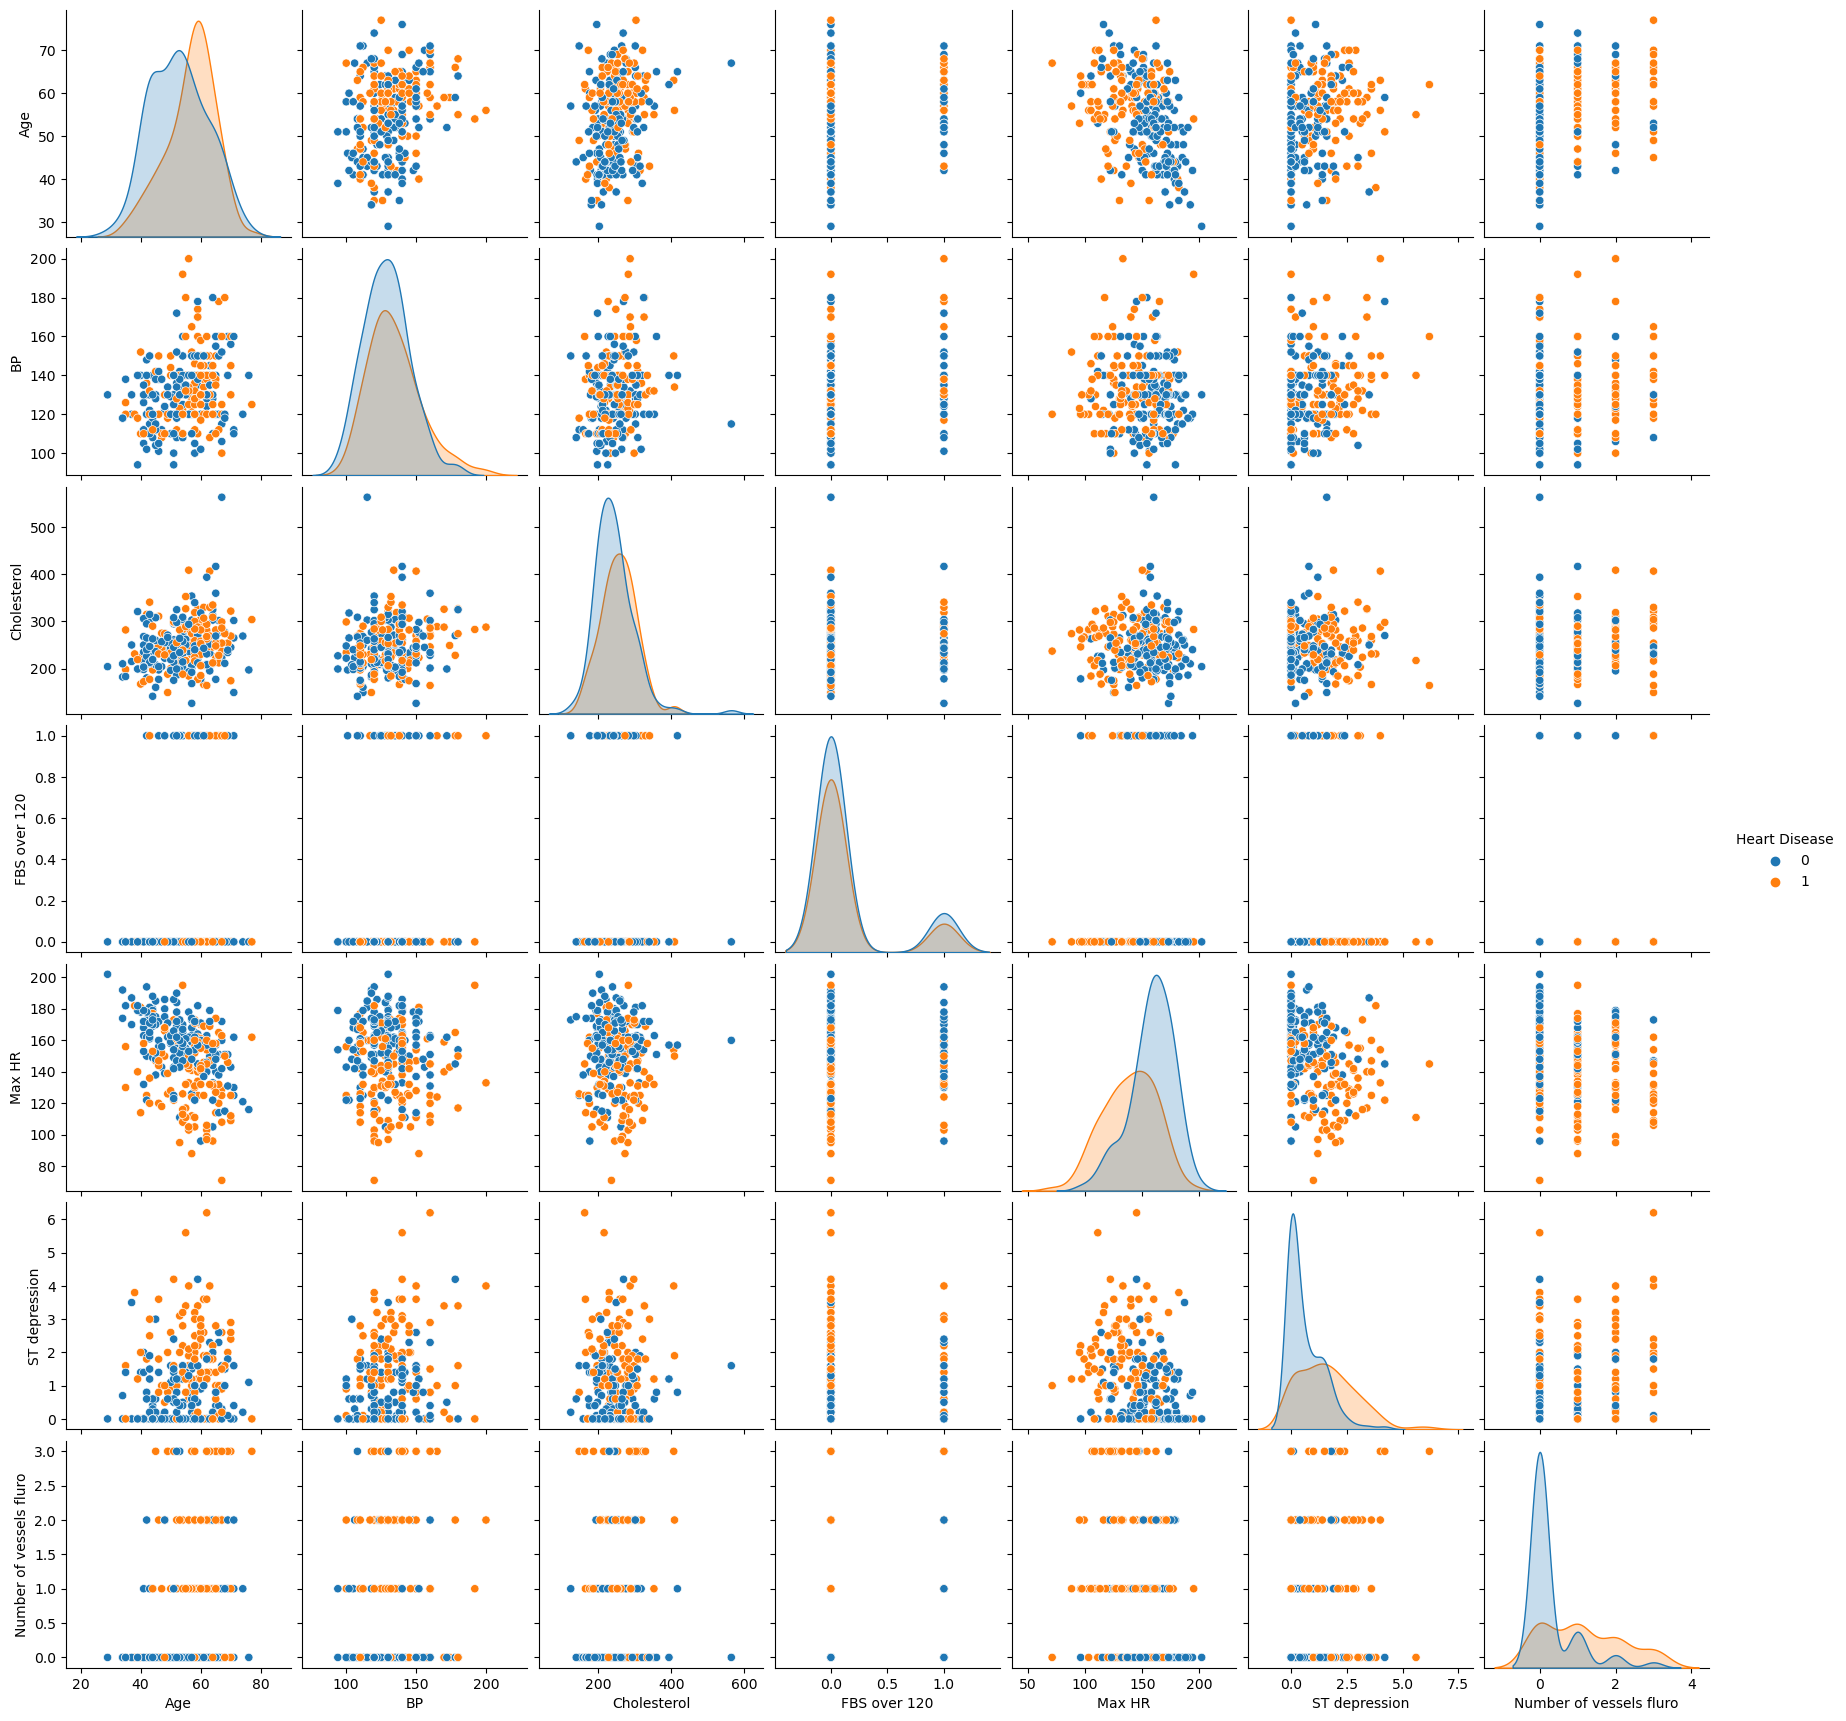

In [12]:
sns.pairplot(df, hue='Heart Disease')

## Train/Test Split and Normalization

In [13]:
X = df.drop(['Heart Disease'], axis = 1)
y = df['Heart Disease']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.7,
                                                   random_state=42)

In [15]:
transformer = MinMaxScaler().fit(X_train)

In [16]:
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.columns = numCols

X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.columns = numCols

In [17]:
(X_train_norm).describe()


,Age,BP,Cholesterol,FBS over 120,Max HR,ST depression,Number of vessels fluro
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.572252,0.356694,0.261298,0.137566,0.537872,0.186380,0.232804
std,0.202942,0.169361,0.124243,0.345359,0.200679,0.192856,0.322345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.422222,0.245283,0.174941,0.000000,0.385965,0.000000,0.000000
50%,0.600000,0.339623,0.243499,0.000000,0.578947,0.161290,0.000000
75%,0.733333,0.433962,0.333333,0.000000,0.684211,0.290323,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Logistic Regression

Accuracy: 0.78


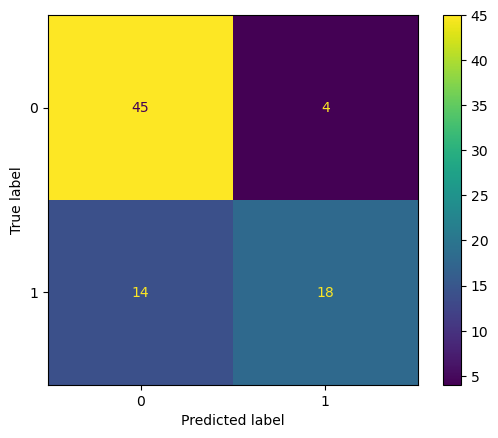

In [18]:
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)
y_pred_lr = lr.predict(X_test_norm)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cmd = ConfusionMatrixDisplay(lr_cm)
print(f"Accuracy: {lr_accuracy:.2f}")
lr_cmd.plot()

## Neural Network

In [24]:
model = Sequential([
    Input(shape=X_train_norm.shape[1:]),
    Dense(8, 'relu'),
    Dense(1, 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train_norm,
                   y_train,
                   validation_split=0.0,
                   epochs = 200,
                   verbose=0)

3/3 [==============================] - 0s 5ms/step
Accuracy: 0.73


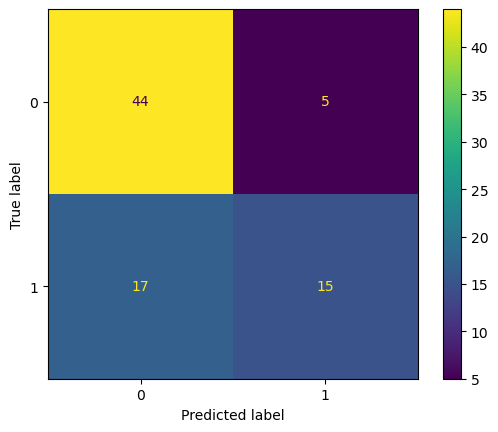

In [27]:
y_pred_tf = (model.predict(X_test_norm) > 0.5).astype("int32")
tf_accuracy = accuracy_score(y_test, y_pred_tf)
tf_cm = confusion_matrix(y_test, y_pred_tf)
tf_cmd = ConfusionMatrixDisplay(tf_cm)
print(f"Accuracy: {tf_accuracy:.2f}")
tf_cmd.plot()

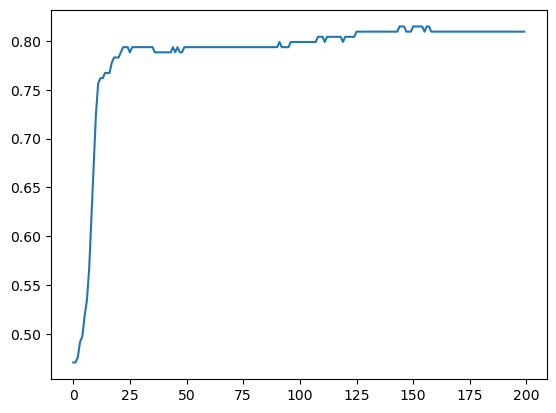

In [28]:
plt.plot(history.history['accuracy'])
plt.show()

## Conclusions

In this case a basic Logistic Regression can perform better than a mmore complex Neural Network.